# Ingreso a Drive y GitHub

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
from getpass import getpass

PASS = getpass('Enter your password')

!git config --global user.email "jltg_1501@hotmail.com"
!git config --global user.name "Jorge-1501"
!git config --global user.password {PASS}

Enter your password··········


In [3]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src

/content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src


In [5]:
!ls -a

conv.py			   network2.py
Épocas_dígitos.png	   network3.py
Épocas_SGDconMomentum.png  network.py
expand_mnist.py		   __pycache__
.ipynb_checkpoints	   Reconocimiento_digitos.ipynb
mnist_average_darkness.py  Tarea_2.pdf
mnist_loader.py		   Tarea3-Redes.ipynb
mnist_svm.py


In [6]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [7]:
#!git add .

In [8]:
#!git commit -m 'Notebook creada: Tarea3-Redes'

In [9]:
#!git push

# Inicio de la Tarea 3

## Parte 1
Red con Keras

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

In [11]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
# Creación del modelo
model = models.Sequential()
model.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
# Compilar el modelo
custom_optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-09)

model.compile(optimizer = custom_optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
4800/4800 [==============================] - 43s 9ms/step - loss: 0.3189 - accuracy: 0.9071 - val_loss: 0.1875 - val_accuracy: 0.9493
Epoch 2/30
4800/4800 [==============================] - 44s 9ms/step - loss: 0.1668 - accuracy: 0.9515 - val_loss: 0.1397 - val_accuracy: 0.9628
Epoch 3/30
4800/4800 [==============================] - 43s 9ms/step - loss: 0.1172 - accuracy: 0.9659 - val_loss: 0.1225 - val_accuracy: 0.9653
Epoch 4/30
4800/4800 [==============================] - 39s 8ms/step - loss: 0.0916 - accuracy: 0.9741 - val_loss: 0.1100 - val_accuracy: 0.9707
Epoch 5/30
4800/4800 [==============================] - 41s 9ms/step - loss: 0.0742 - accuracy: 0.9792 - val_loss: 0.1098 - val_accuracy: 0.9721
Epoch 6/30
4800/4800 [==============================] - 41s 8ms/step - loss: 0.0628 - accuracy: 0.9822 - val_loss: 0.1064 - val_accuracy: 0.9714
Epoch 7/30
4800/4800 [==============================] - 39s 8ms/step - loss: 0.0544 - accuracy: 0.9849 - val_loss: 0.0978 - val_ac

In [16]:
# Evaluación el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0998 - accuracy: 0.9815
Precisión en el conjunto de prueba: 0.9815000295639038


In [17]:
import matplotlib.pyplot as plt

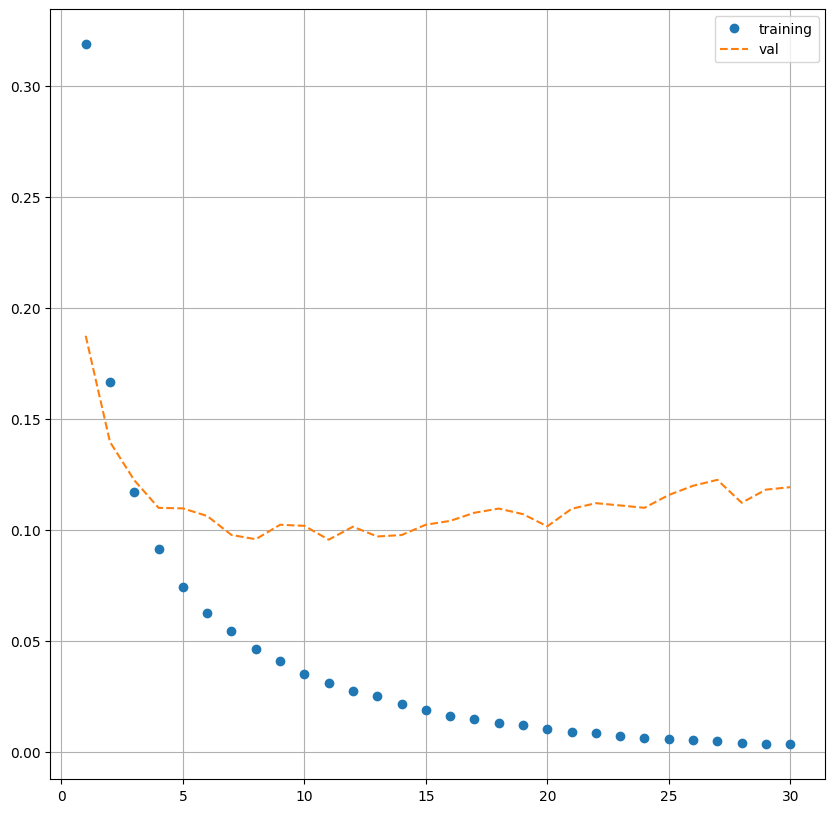

In [18]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.grid()
plt.show()

¿Obtuviste resultados similares? No, fueron notablemente mejores. Se obtuvo un accurancy del 0.9815 contra un 0.8412 del anterior modelo.


¿Tardó lo mismo para entrenar el mismo número de epocas? Tardó menos, un aproximado de 21 minutos contra los casi 30 anteriormente.

In [ ]:
°

## Parte 2
Modificacion de parámetros

## Parte 3
Implimentación de regularizadores

# Reporte de resultados